(2) Random forests for image approximation
<br>b,c) Preprocessing the input, output

#Source: http://pillow.readthedocs.io/en/3.4.x/reference/Image.html
#Source: http://www.nerdparadise.com/programming/pythonpil
#Source: http://effbot.org/imagingbook/image.htm

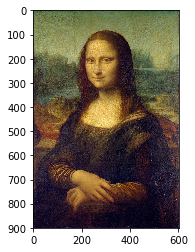

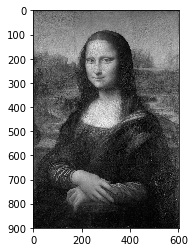

In [1]:
from PIL import Image
from matplotlib import pylab as plt
import numpy as np
from random import randint
%matplotlib inline

#Load Image
MonaLisa = Image.open("MonaLisa.jpg")
MonaLisa_NPArray = np.asarray(MonaLisa)
plt.imshow(MonaLisa_NPArray)
plt.show()

#Preprocessing Output: Turn to Grayscale
MonaLisa_Gray = MonaLisa.convert("L")
MonaLisa_Gray_NPArray = np.asarray(MonaLisa_Gray)
plt.imshow(MonaLisa_Gray_NPArray, cmap='gray')
plt.show()

# print(MonaLisa_NPArray.shape)
# print('MonaLisa.size[0],MonaLisa.size[1]', MonaLisa.size[0],MonaLisa.size[1])
# print('MonaLisa_NPArray', MonaLisa_NPArray)

height = MonaLisa_Gray_NPArray.shape[0]
width = MonaLisa_Gray_NPArray.shape[1]

random_Points = [] #5000 random coordinates
weight = [] #R,G,B values of the points in random_Points
for i in range(5000):
    ran_row = randint(0, height-1)
    ran_col = randint(0, width-1)
    random_Points.append([ran_row, ran_col])
    #another way to get RBG value: MonaLisa_Gray_NPArray[ran_row,ran_col]
    gray_brightness = MonaLisa_Gray.getpixel((ran_col,ran_row)) #getpixel(x,y); 
    weight.append(gray_brightness)
    

d) Random Forest
#Source: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#Source: http://blog.datadive.net/random-forest-interpretation-with-scikit-learn/


In [2]:
all_pixel_coordinates=[]
for i in range(height):
    for j in range (width):
        all_pixel_coordinates.append((i,j))
print('total number of pixels:', len(all_pixel_coordinates))

# pixels = MonaLisa_Gray.getdata()
# pixels = np.array(pixels)
#the pixels given by the getdata() method doesn't work with the RF model 

total number of pixels: 543600


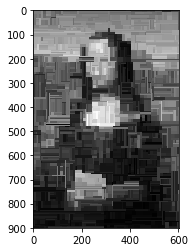

In [3]:
from sklearn.ensemble import RandomForestRegressor

def experimentation (depth=None, num_trees = 1, title=None):    
    RF = RandomForestRegressor(max_depth=depth, n_estimators=num_trees)
    RF.fit(random_Points, weight)
    prediction = RF.predict(all_pixel_coordinates)
    plt.imshow(np.array(prediction).reshape(height, width), cmap="gray")
    if title != None: 
        plt.title(title)
    plt.show()

experimentation()

e) Experimentation

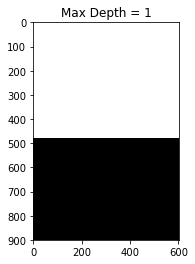

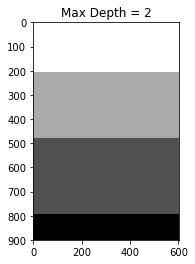

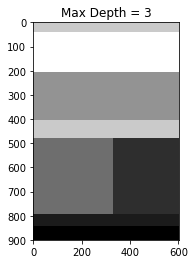

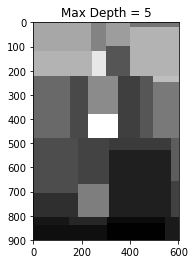

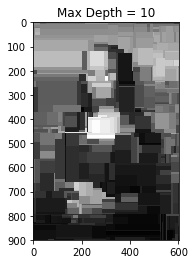

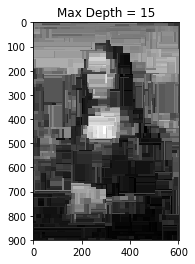

In [4]:
#variable depths
all_depths = [1,2,3,5,10,15]
for depth in all_depths:
    experimentation(depth, 1, "Max Depth = " + str(depth))

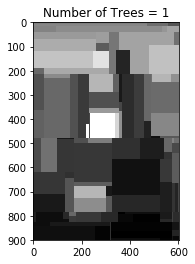

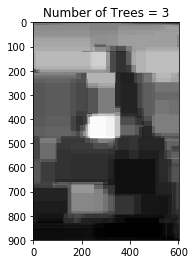

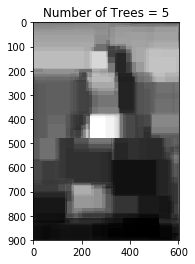

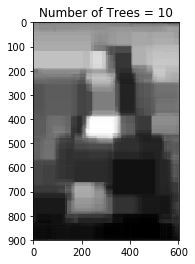

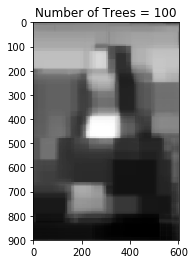

In [5]:
#variable number of trees
num_of_trees = [1,3,5,10,100]
for single_numOfTrees in num_of_trees:
    experimentation(7, single_numOfTrees, "Number of Trees = " + str(single_numOfTrees))

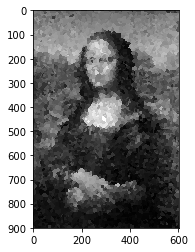

In [6]:
#iii) kNN for k=1
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(random_Points, weight) 
prediction = model.predict(all_pixel_coordinates)
plt.imshow(np.array(prediction).reshape(height, width), cmap="gray")
plt.show()